* For the use of this model I'm going to use the toy wine dataset within scikit-learn as I'm corioues about the possible clustering of chemical-related qualites of the wines.
As before and always, I should explore this dataset,

In [ ]:
import pandas as pd
from sklearn.datasets import load_wine

wine = load_wine()
db = pd.read('wine')

print(db.head(5))


It seems the data can't be read this way when using such a internal dataset. Looking into it, it's because this dataset isn't pandas DataFrame so to begin with such a reading method I've used here won't work: I'm in luck though as there is such a method of converting or maybe getting the dataset as a DataFrame,

In [ ]:
import pandas as pd
from sklearn.datasets import load_wine

wine = load_wine(as_frame=True)
wine_df = wine.frame

print(wine_df.head(5))

That worked, which is a note to make sure what's being passed to a function using the pd packages requires it to be a dataframe. Anyways, I can see there's about 14 columns are features of the different sorts of wine's chemical makeup; as well, I see that there is a target column which make be considered to be the Label if this were a classification probelm.

** Applying KMeans
Looking into the documantion for KMeans I find the complete model syntax for it,

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_wine
import pandas as pd
import matplotlib as mp

wine = load_wine(as_frame=True)

# such a declartion of the X object is possible due to the wine set already being split
X = wine.data

# Instantiating & fitting the model with it's parameters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X)

centroids = kmeans.cluster_centers_
inertia_value = kmeans.inertia_


I'm thinking that the dataset has to be split into features and a- I think I might be thinking more in a supervised context rather then a unsuprived one; what I mean is that for unsupervised models I don't have to define a target varibale as I'm not seeking to find some function which can map features to a target variable; instead, I'm finding patterns within the data. This should then mean I'm just going to ignore the target column and pass the rest of the features to the model: luckly this is done for me by the .data method belonging to the wine data set is just that.

I've also used the 'cluster_centers_' and 'kmeans_inertia_' methods belonging to 'kmeans' to record such values from the model.

*** Visualing the output
With the pipeline created, I just now need to see it. As scikit lacks a built-in system for viewing the output of the KMeans model, I have to create my own in some sense. To do that, I'll be using Matplotlib.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_wine
import pandas as pd
import matplotlib.pyplot as plt

wine = load_wine(as_frame=True)

# such a declartion of the X object is possible due to the wine set already being split
X = wine.data


# Instantiating & fitting the model with it's parameters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X)

# Recording the needed outputs
centroids = kmeans.cluster_centers_
inertia_value = kmeans.inertia_


plt.figure(figsize=(10, 6))

# Plotting all of the data points
plt.scatter(
X[:, x_feature_index],
X[:, y_feature_index],
c=cluster_labels,
cmap='virids',
marker='o',
s=50,
alpha=0.7,
label='Data Points'
)
# now plotting all of the centriods
plt.scatter(
centroids[:, x_feature_index],
centroids[:, y_feature_index],
c='red',
marker='X',
s=200,
label='Centroids',
edgecolor = 'black'
)
# adding labels & display
plt.xlabel(feature_names[x_feature_index].capitalize())
plt.ylabel(feature_names[y_feature_index].capitalize())
plt.title(f'K-Means Clustering of Wine Data (k=3): {feature_names[x_features_index].capitalize()} vs. {feature_names[y_features_index].capitalize()}')
plt.legend()
plt.grid(True)

plt.savefig('wine_kmeans.png', bbox_inches='tight')
plt.show


At this point I realized this method of plotting the output of the KMeans model would require picking two features which should best represent the clustering found by the model, but that isn't something I can just do in my head; rather, it would be better to recall back to the use of PCA for deminseionality reduction. The use of PCA here would help to find two componets which principally captures most of the variance within the dataset (that which is representing the spread of data round it's mean) while reducing it down for easier graphablity.

*** Backstep: Applying PCA and then visualiztion

As before, the first step is to load the data, but I have to then standarize the data into scalers in order to preform PCA; this isn't to say what's passed to the KMeans model is the output of PCA here but instead will be used for inheirenting the cluster lables.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Loading the wine data and seperating the features by object declaration
wine = load_wine(as_frame=True)
X = wine.data
feature_name = X.columns

# Standarizing the data by scaler transformation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying PCA to reduce the feature value set down
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# Creating a dataframe of the two componets, which would be in 2D
X_pca = pd.DataFrame(data=principal_componenets, columns=['PC1', 'PC2'])

with the data imported, standarized, and reduced down to it's principle componets I'll actually run KMeans on the complete set and then assign the cluster labels to the PCA data in order to map the different 13D clusters onto the 2D plane of the principle componets

In [ ]:
# Instantiating & fitting the KMeans model onto the scaled data
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X_scaled)

# Recording outputs
inertia_values = kmeans.inertia_
cluster_labels = kmeans.labels_
centroids_original_space = kmeans.cluster_centers_

# adding the cluster labels to the 2D PCA data
X_pca['Cluster'] = cluster_labels

and then, besides transforming the centroids onto the PCA space, I can begin to constrsut a plot using plt to see the results,

In [ ]:
centroids_pca_space = pca.transform(centroids_orginal_space)

plt.figure(figsize(10, 6))

# plotting the data points which are colored by the cluster they belong to
scatter = plt.scatter(
 X_pca['PC1'],
 X_pca['PC2'],
 c=X_pca['Cluster'],
 cmap='plasma',
 marker='o',
 s=50,
 alpha=0.7,
 label='Data Points'
 )

# plotting the cluster centroids into the 2D PCA space
plt.scatter(
    centroids_pca_space[:, 0], # PC1 position
    centroids_pca_space[:, 1], # PC2 position
    marker='X',
    s=300,
    color='red',
    edgecolors='black',
    label='Centroids'
)

# Calculate and display the variance explained by the two components
variance_explained = np.sum(pca.explained_variance_ratio_) * 100

# Add titles and labels
plt.title(f"K-Means Clustering (k=3) on Wine Dataset (PCA Visualization)", fontsize=14)
plt.xlabel(f"Principal Component 1 (PC1)")
plt.ylabel(f"Principal Component 2 (PC2)")
plt.text(0.95, 0.05, f'Variance Explained: {variance_explained:.1f}%',
         transform=plt.gca().transAxes, horizontalalignment='right',
         bbox=dict(boxstyle="round,pad=0.5", fc="white", alpha=0.8))
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

**** What about different values for 'k'?
First, 'k' values are the number of clusters which the observations, which here are features, are paritioned into; this would mean increasing the amount of clusters should give greater....well let's see actually

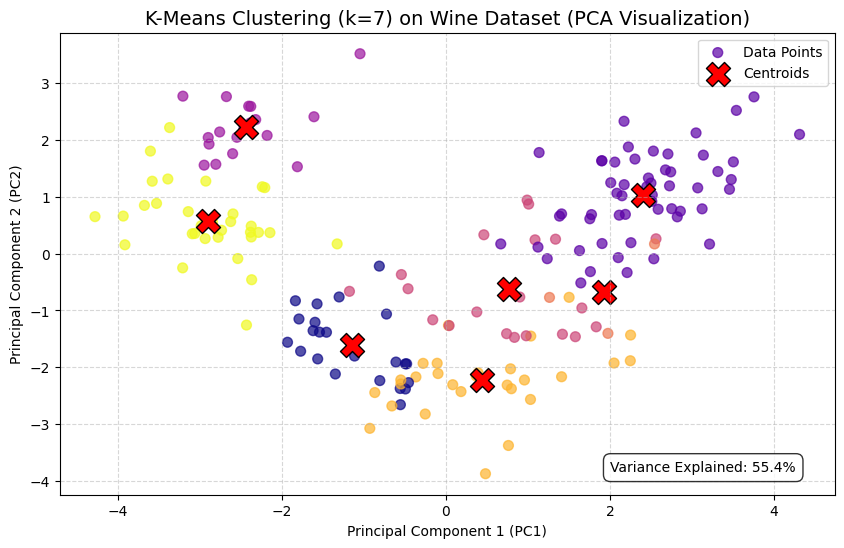

In [1]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Loading the wine data and seperating the features by object declaration
wine = load_wine(as_frame=True)
X = wine.data
feature_name = X.columns

# Standarizing the data by scaler transformation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying PCA to reduce the feature value set down
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# Creating a dataframe of the two componets, which would be in 2D
X_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Instantiating & fitting the KMeans model onto the scaled data
kmeans = KMeans(n_clusters=7, random_state=42, n_init=10)
kmeans.fit(X_scaled)

# Recording outputs
inertia_values = kmeans.inertia_
cluster_labels = kmeans.labels_
centroids_original_space = kmeans.cluster_centers_

# adding the cluster labels to the 2D PCA data
X_pca['Cluster'] = cluster_labels

centroids_pca_space = pca.transform(centroids_original_space)

plt.figure(figsize=(10, 6))

# plotting the data points which are colored by the cluster they belong to
scatter = plt.scatter(
 X_pca['PC1'],
 X_pca['PC2'],
 c=X_pca['Cluster'],
 cmap='plasma',
 marker='o',
 s=50,
 alpha=0.7,
 label='Data Points'
 )

# plotting the cluster centroids into the 2D PCA space
plt.scatter(
    centroids_pca_space[:, 0], # PC1 position
    centroids_pca_space[:, 1], # PC2 position
    marker='X',
    s=300,
    color='red',
    edgecolors='black',
    label='Centroids'
)

# Calculate and display the variance explained by the two components
variance_explained = np.sum(pca.explained_variance_ratio_) * 100

# Add titles and labels
plt.title(f"K-Means Clustering (k=7) on Wine Dataset (PCA Visualization)", fontsize=14)
plt.xlabel(f"Principal Component 1 (PC1)")
plt.ylabel(f"Principal Component 2 (PC2)")
plt.text(0.95, 0.05, f'Variance Explained: {variance_explained:.1f}%',
         transform=plt.gca().transAxes, horizontalalignment='right',
         bbox=dict(boxstyle="round,pad=0.5", fc="white", alpha=0.8))
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.savefig('wine_kmeans_k7.png', bbox_inches='tight')
plt.show()

The scatter plot which is produced now can be seen to have the four other clusters after increasing the value of 'k' from three to seven. The overall shape from only three clusters seems to still exist in the graph with seven clusters, but it's now possible to see the overlaping features which make up a cluster.

** Review
To review, I'd like to focus on how the clusters would align with my expections: unfortuanlly, I didn't have any going in due to me not knowing much about wine. I've tasted it before and tired other kinds, so maybe instead looking into what I found by experimenting with greater amount of clusters mind teach me a few things.

*** What the greater amount of overlapping clusters mean.
To put it in greater context, I'm asking the question what does it mean to visually see a mix of feature types clusterd around a centroid when it's mapped to a dimensionally reduced plane made up of it's two principle componets, where the variance explained is 55.4%.

To start, the variance being so low means that the two principle componets alone aren't enough to explain a higher degree of the data; this could be producing the effect where the clusters are possibly more seperated in the orignal dimension, but here due to compression results in a more average, closely positioned spread of clusters. Looking deeper into the graph by effect, many of the data points seem to lack a greater amount of seperation and weak grouping meaning it appears the features lack a great amount of difference from each other causing them to have similarities between multiple cluster types.

*** What it might mean for KMeans
It might be noted now that it might be a 'weakness' or just simply an inapprote use of PCA Analysis when working with KMeans, requirng a greater understanding of how dimensionality sometimes will not always translate well to trying to converse between higher and lower one when the former is to be represented as the latter.